<a href="https://colab.research.google.com/github/Nikhil-gitub/ADMB_27/blob/main/outliers_1934_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

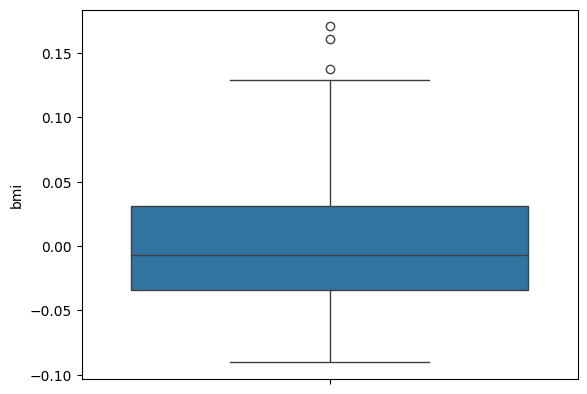

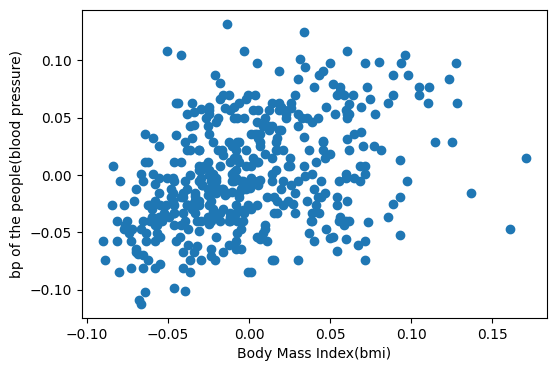

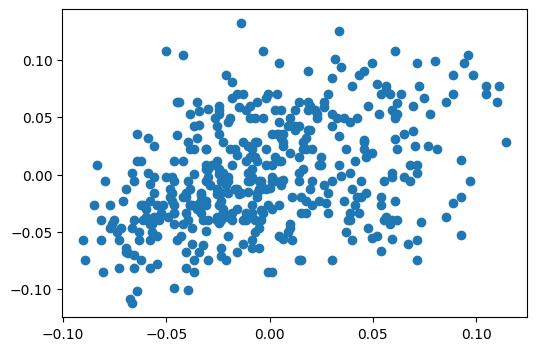

In [2]:
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt # Changed this line
#Load the dataset
diabetics=load_diabetes()
df_diabetics = pd.DataFrame(diabetics.data, columns=diabetics.feature_names) # Convert to DataFrame
df_diabetics['target'] = diabetics.target # Add the target variable
import seaborn as sns
sns.boxplot(df_diabetics['bmi'])
fig,ax=plt.subplots(figsize=(6,4))
ax.scatter(df_diabetics['bmi'],df_diabetics['bp'])
ax.set_xlabel('Body Mass Index(bmi)')
ax.set_ylabel('bp of the people(blood pressure)')
import seaborn as sns
import matplotlib.pyplot as plt

def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box plot of {column}')
    plt.show()

    removed_outliers = df[df[column] <= threshold] # Corrected indentation

    sns.boxplot(removed_outliers[column]) # Corrected indentation
    plt.title(f'Box plot of {column} after removing outliers')
    plt.show()
import numpy as np
outlier_indices=np.where((df_diabetics['bmi']>0.12)&(df_diabetics['bp']<0.8))
no_outliers=df_diabetics.drop(outlier_indices[0])
fig,ax_no_outliers=plt.subplots(figsize=(6,4))
ax_no_outliers.scatter(no_outliers['bmi'],no_outliers['bp'])
plt.show()

In [4]:
import numpy as np
from scipy import stats
z = np.abs(stats.zscore(df_diabetics['age']))
print(z)

0      0.800500
1      0.039567
2      1.793307
3      1.872441
4      0.113172
         ...   
437    0.876870
438    0.115937
439    0.876870
440    0.956004
441    0.956004
Name: age, Length: 442, dtype: float64


In [9]:
import numpy as np
outlier_indices = np.where(z>2)[0]
no_outliers = df_diabetics.drop(outlier_indices)
print(no_outliers.shape)
"OR"
outlier_indices = np.where(z>2)[0]
no_outliers=df_diabetics.drop(outlier_indices)


print(df_diabetics.shape)
print("=======================")
print(no_outliers.shape)

(426, 11)
(442, 11)
(426, 11)


In [10]:
Q1 = np.percentile(df_diabetics['bmi'], 25, method='midpoint')

Q3 = np.percentile(df_diabetics['bmi'], 75, method='midpoint')

IQR = Q3- Q1

print(IQR)

0.06520763046978838


In [13]:
upper = Q3+1.5*IQR

upper_array = np.array(df_diabetics['bmi'] >= upper)

print("Upper Bound is:", upper)

print("------------------")
print(upper_array.sum())

lower = Q1-1.5*IQR

lower_array = np.array(df_diabetics['bmi'] <= lower)

print("Lower Bound is:", lower)

print("-------------------")

print(lower_array.sum())

Upper Bound is: 0.12879000811776306
------------------
3
Lower Bound is: -0.13204051376139045
-------------------
0


In [15]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

data = pd.read_csv("scores.csv")

##data.shape

data.sample(5)

data.describe()

,Emotional_Quotient,Intelligence_Quotient,Marks
count,80.000000,80.000000,80.000000
mean,73.125000,145.262500,76.062500
std,6.672018,21.560479,9.195959
min,50.000000,120.000000,45.000000
25%,68.000000,130.000000,72.000000
50%,73.000000,135.000000,76.000000
75%,78.000000,160.250000,81.250000
max,92.000000,215.000000,100.000000


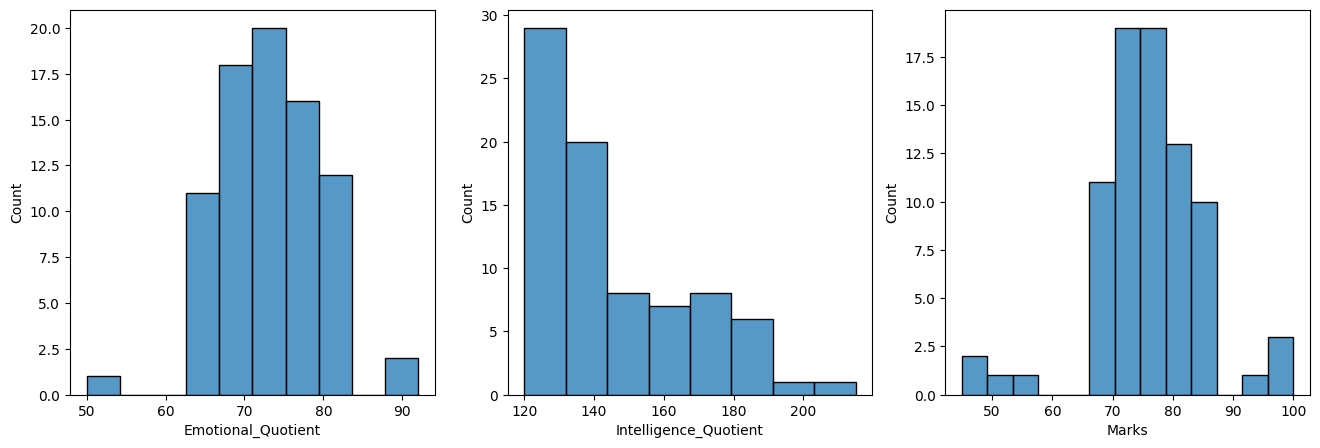

In [17]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1,)
sns.histplot(data['Emotional_Quotient'])

plt.subplot(1,3,2)
sns.histplot(data['Intelligence_Quotient'])

plt.subplot(1,3,3)
sns.histplot(data['Marks'])

plt.show()

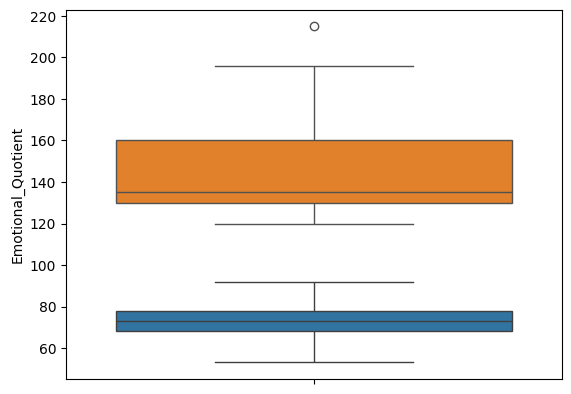

In [22]:
z_score_upper_limit=data['Emotional_Quotient'].mean()+3*data['Emotional_Quotient'].std()
z_score_lower_limit=data['Emotional_Quotient'].mean()-3*data['Emotional_Quotient'].std()
z_score_upper_limit
z_score_lower_limit

data["Emotional_Quotient"]=np.where(
    data["Emotional_Quotient"]>z_score_upper_limit,
    z_score_upper_limit,np.where(
        data["Emotional_Quotient"]<z_score_lower_limit,
        z_score_lower_limit,
        data["Emotional_Quotient"]
        )
    )
data.describe()

sns.boxplot(data["Emotional_Quotient"])
data["Intelligence_Quotient"].skew()
sns.boxplot(data["Intelligence_Quotient"])


percentile25=data["Intelligence_Quotient"].quantile(0.25)
percentile75=data["Intelligence_Quotient"].quantile(0.75)

Upper limit
Lower limit 84.625


<Axes: ylabel='Intelligence_Quotient'>

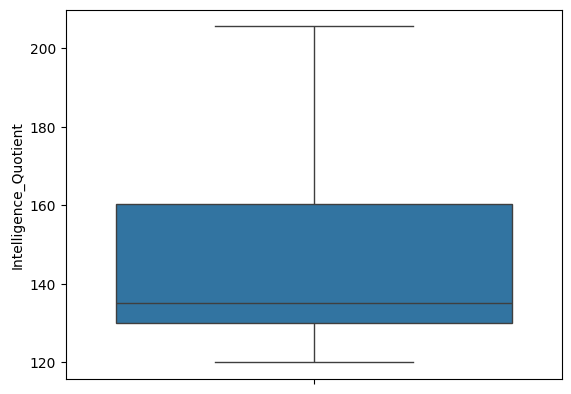

In [26]:
percentile25=data["Intelligence_Quotient"].quantile(0.25)
percentile75=data["Intelligence_Quotient"].quantile(0.75)

percentile75
iqr=percentile75 - percentile25
iqr

iqr_upper_limit=percentile75 + 1.5*iqr
iqr_lower_limit=percentile25 - 1.5*iqr

print("Upper limit"),iqr_upper_limit
print("Lower limit",iqr_lower_limit)


data[data["Intelligence_Quotient"]>iqr_upper_limit]
data[data["Intelligence_Quotient"]<iqr_lower_limit]
data["Intelligence_Quotient"]=np.where(
    data["Intelligence_Quotient"]>iqr_upper_limit,
    iqr_upper_limit,
    np.where(data["Intelligence_Quotient"]<iqr_lower_limit,
    iqr_lower_limit,
    data["Intelligence_Quotient"]
             ))
data.describe()
sns.boxplot(data['Intelligence_Quotient'])